In [1]:
# Vinculando endereços de drive para query
path = 'C:/Users/murilo.ribeiro/EUROCHEM FERTILIZANTES TOCANTINS/S&OP - Documentos/08. Bases/ML Database/'
file1 = 'CSV_deliveries.csv'
file2 = 'CSV_production.csv'
file3 = 'GrossMargin.csv'

In [2]:
# Importanto as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando pacotes necessários
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Ignorar mensagens de erro
import warnings
warnings.filterwarnings('ignore')

# Definindo o tamanho e estilo dos gráficos
plt.rc("figure",figsize=(15,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
df = pd.read_csv(path+file3)
df['GM'].fillna(0,inplace=True)

## Dataframe global
df['Date'] = pd.to_datetime(df['Date'])
dm = df.groupby(pd.Grouper(key='Date', freq='M'))['GM'].sum()
dm = pd.DataFrame(dm)

## Margem por Mês

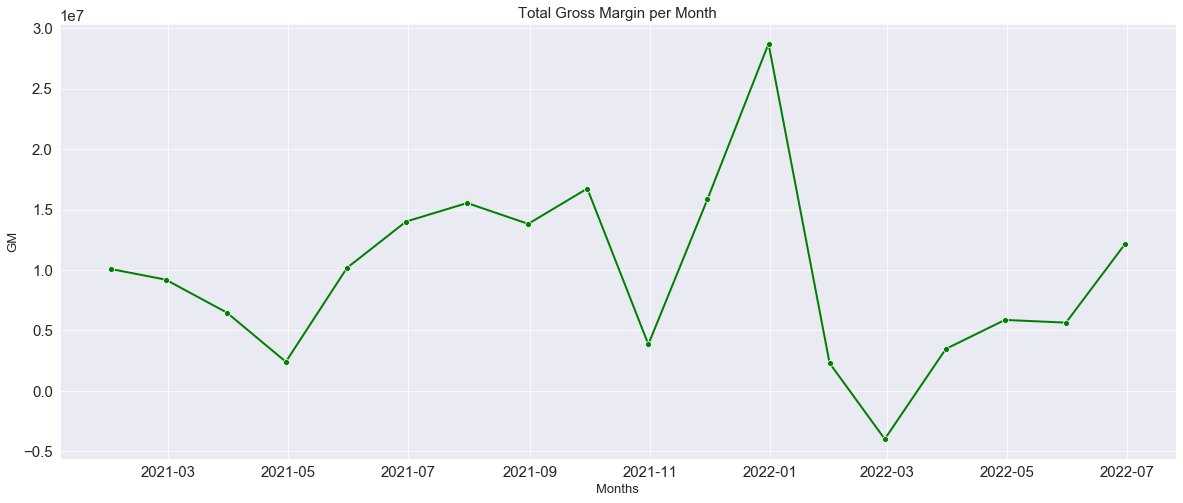

In [4]:
## Plot de Gross Margin por Dia
plt.rc("figure",figsize=(20,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style('darkgrid')
mDeliveries = sns.lineplot(data = dm, x=dm.index, y = dm['GM'], color = 'green', marker = 'o')
mDeliveries.set_title('Total Gross Margin per Month', fontsize = 15)
mDeliveries.set_ylabel('GM', fontsize = 13)
mDeliveries.set_xlabel('Months', fontsize = 13)
plt.show()

In [5]:
#Base Histórica para treino do modelo
treino = dm[:-5]
#Base Histórica para teste do modelo
teste = dm[-5:]

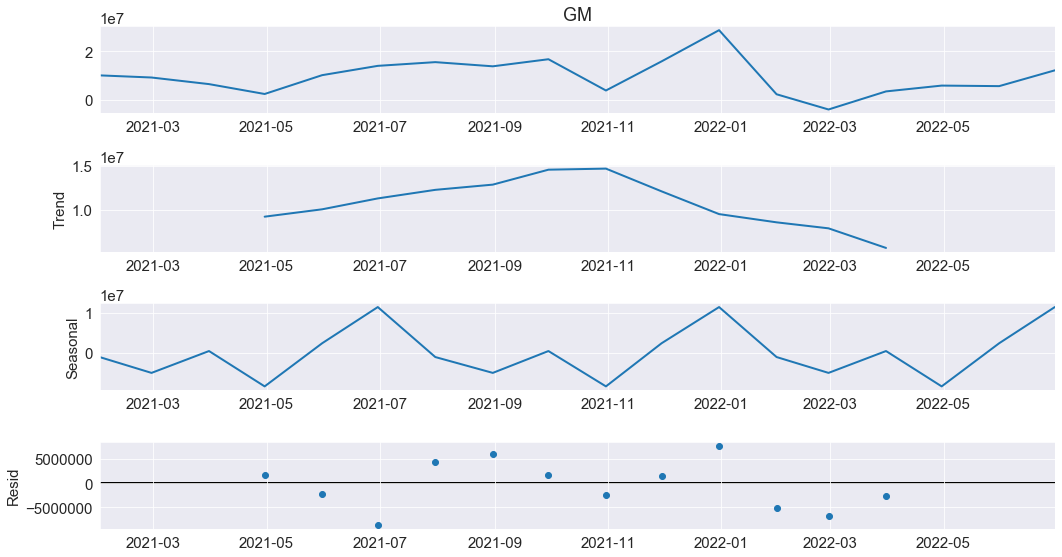

In [6]:
plt.rc("figure",figsize=(15,8))
result_deliveriesm = seasonal_decompose(dm['GM'], model='additive', freq=6)
result_deliveriesm.plot()
pyplot.show()

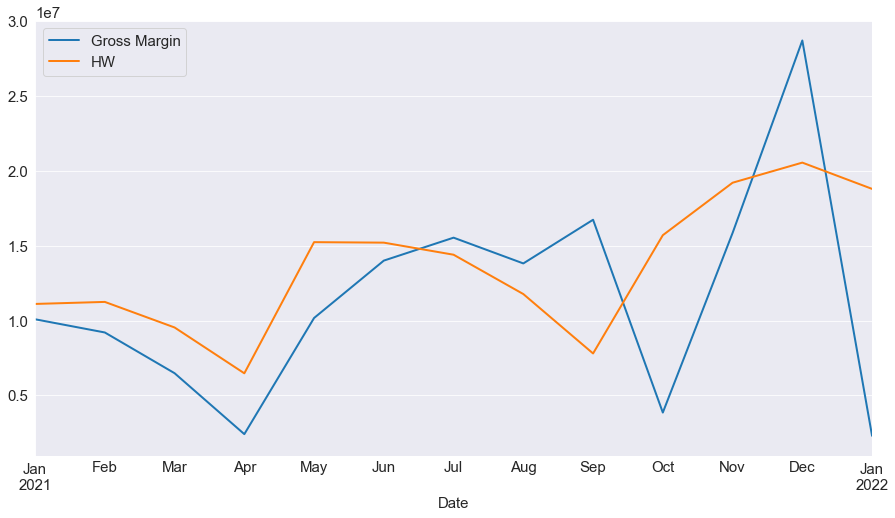

In [7]:
modelo_m1_HW = ExponentialSmoothing(treino['GM'],trend='add',seasonal='add',seasonal_periods=5).fit();
treino['HoltWinters'] = modelo_m1_HW.fittedvalues
treino['GM'].plot(legend=True,label='Gross Margin')
treino['HoltWinters'].plot(legend=True,label='HW')
plt.show()

In [8]:
modelo_HW = ExponentialSmoothing(dm['GM'],trend='add',seasonal='add',seasonal_periods=6).fit();
predito_HW = modelo_HW.forecast(6).rename('Modelo de Holt-Winters')

In [9]:
predito_HW

2022-07-31    6395846.009854616
2022-08-31    4629715.158568899
2022-09-30    1026805.682382634
2022-10-31   -3929233.668650175
2022-11-30    2951653.554469346
2022-12-31    5905853.262839519
Freq: M, Name: Modelo de Holt-Winters, dtype: float64

In [10]:
y = predito_HW.sum()
x = dm['GM'][-6:].sum()
print(f'Total Gross Margin: {y+x}')

Total Gross Margin: 42458561.396270365


In [11]:
x = dm['GM'][-6:].sum()

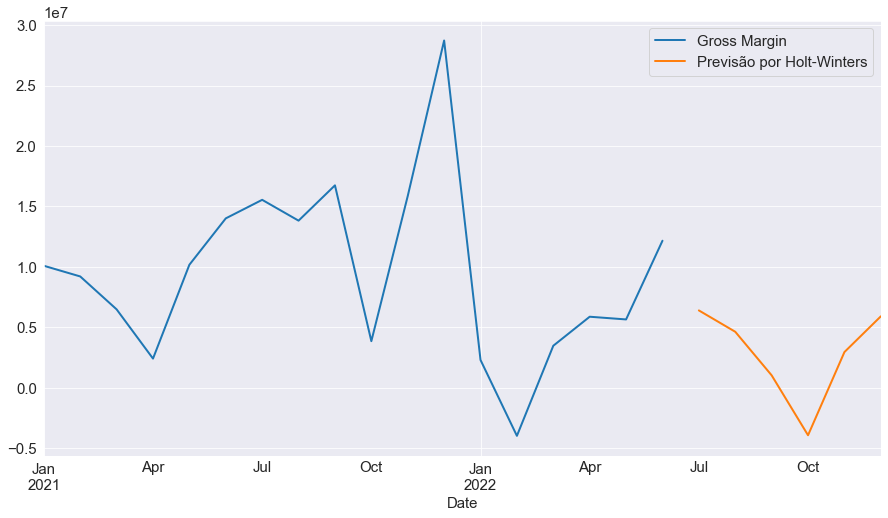

In [12]:
predito_HW = modelo_HW.forecast(6).rename('Modelo de Holt-Winters')
dm['GM'][:].plot(legend=True,label='Gross Margin')
predito_HW.plot(legend=True,label='Previsão por Holt-Winters')
plt.show()

In [13]:
dm[-6:].sum()

GM   25477921.396805525
dtype: float64

In [14]:
Total_GM = dm[-6:].sum() + predito_HW[0] + predito_HW[1] + predito_HW[2] + predito_HW[3] + predito_HW[4] + predito_HW[5]

In [15]:
print(f'Total Gross Margin for 2022: {Total_GM}')

Total Gross Margin for 2022: GM   42458561.396270365
dtype: float64


In [16]:
dm[0:11].sum()

GM   118189164.807736009
dtype: float64

## Margem por dia

In [17]:
#Base Histórica para treino do modelo diário
treinod = df[:-60]
#Base Histórica para teste do modelo diário
tested = df[-60:]

In [18]:
auto_arima(treinod['GM'],seasonal=False)
stepwise_fit = auto_arima(treinod['GM'],
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=101449.754, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=104095.044, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=102923.367, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=101504.210, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104093.044, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=101449.379, Time=1.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=101463.676, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=101503.435, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=101438.239, Time=0.67 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=101444.579, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=101427.826, Time=4.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=101433.396, Time=1.64 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=101425.127, Time=5.74 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=101432.902, Time=0.93 sec
 ARIM

In [19]:
modelo = SARIMAX(df['GM'], order=(3,1,5), seasonal_order=(0,0,0,0))
resultado = modelo.fit()
forecast = resultado.get_forecast(14)

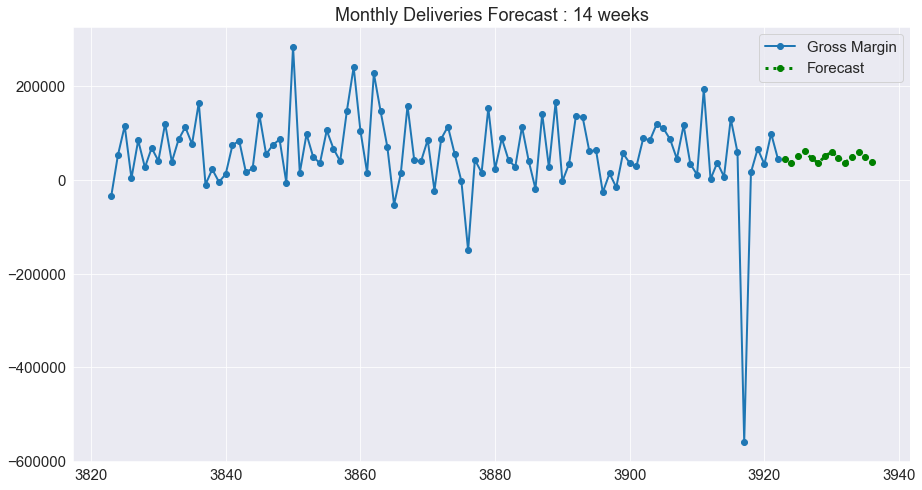

In [20]:
df['GM'][-100:].plot(legend=True,label='Gross Margin',marker='o')
forecast.predicted_mean.plot(legend=True,label='Forecast',linestyle='dotted',marker='o',linewidth=3,color='green')
plt.title('Monthly Deliveries Forecast : 14 weeks')
plt.show()